### Mesclando todos os arquivos JSON em apenas um


In [7]:
import json
import glob
from os import listdir

files_iterator = filter(lambda file: file.endswith('.json'), listdir("../content/"))

files = list(files_iterator)

def merge_JsonFiles(files):
    result = list()
    for file in files:
        with open(file, 'r') as infile:
            result.extend(json.load(infile))

    with open('../dist/history.json', 'w') as output_file:
        json.dump(result, output_file)

merge_JsonFiles(files)

['endsong_1.json', 'endsong_3.json', 'endsong_6.json', 'endsong_7.json', 'endvideo.json', 'endsong_4.json', 'endsong_5.json', 'endsong_2.json', 'history.json', 'endsong_0.json']


### Importar depedências

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Lendo arquivo JSON gerado

In [ ]:
df = pd.read_json("../content/history.json")

### Removendo colunas desnecessárias

In [ ]:
df.rename(
    columns={
      'master_metadata_track_name': 'track',
      'master_metadata_album_album_name': 'album', 
      'master_metadata_album_artist_name': 'artist'
    },
    inplace=True
)

df.drop(columns=["ms_played", 
                      "conn_country",
                      "user_agent_decrypted",
                      "reason_start",
                      "reason_end",
                      "shuffle",
                      "username",
                      "platform",
                      "offline_timestamp",
                      "offline",
                      "ip_addr_decrypted",
                      "spotify_episode_uri","skipped",
                      "spotify_track_uri",
                      "incognito_mode",],
                      inplace=True)

df.sort_values(by='ts', ascending=True, inplace=True)


### Artistas mais ouvidos

In [ ]:
most_listeners = df["artist"].value_counts().head(10).sort_values(ascending=False)

most_listeners.plot(kind='bar',color=[
    '#9e0142',
    '#d53e4f',
    '#f46d43',
    '#fdae61',
    '#e6f598',
    '#abdda4',
    '#66c2a5',
    '#3288bd',
    '#5e4fa2',
])

plt.xticks(rotation=45, ha='right')

plt.show()


### Reproduções em cada ano

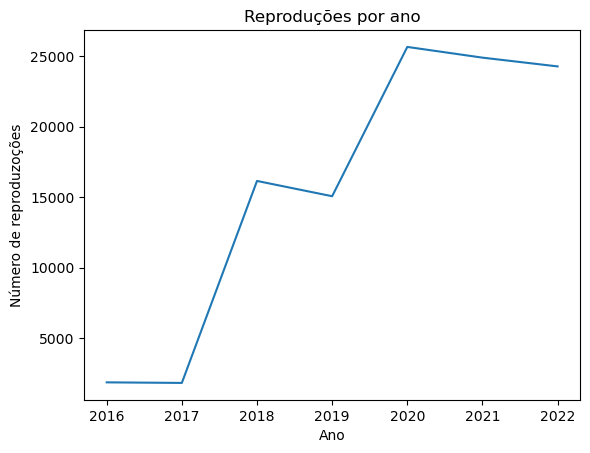

In [7]:
df_local = df.copy()

def sanitezeDate(date):
    [year, _, __] = date.split('T')[0].split('-')
    return year

# Cria coluna com a o ano de reprodução
df_local["year"] = df["ts"].apply(sanitezeDate)

# Remove as linhas com ano igual 2023
df_local = df_local.loc[df_local['year'] != '2023']

# Ordena o dataframe por ano
df_local = df_local.sort_values('year')

ocorrencias_por_ano = df_local['year'].value_counts().sort_index()

plt.title('Reproduções por ano')
plt.xlabel('Ano')
plt.ylabel('Número de reproduzoções')
plt.plot(ocorrencias_por_ano.index, ocorrencias_por_ano.values)
plt.show()

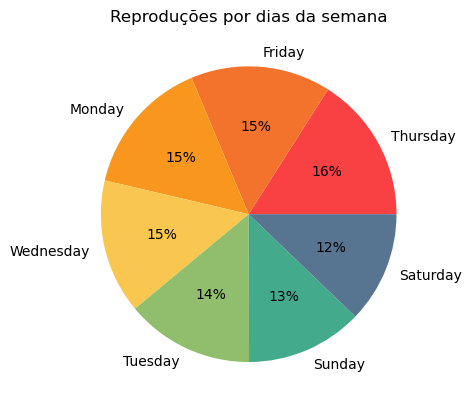

In [9]:
import datetime
import calendar

def sanitezeDate(date):
    [year, month, day] = date.split('T')[0].split('-')
    day = datetime.datetime(int(year), int(month), int(day)).weekday()
    return calendar.day_name[day]

df_local["weekday"] = df["ts"].apply(sanitezeDate)
colors = ['#f94144','#f3722c','#f8961e','#f9c74f','#90be6d', '#43aa8b','#577590']

most_listeners = df_local["weekday"].value_counts().sort_values(ascending=False)
most_listeners.plot(
    kind='pie',
    title="Reproduções por dias da semana", 
    colors=colors,
    label='',
    autopct='%1.0f%%')

plt.show()
